=== DISHPATCH SUPPER CLUB - ANALYSE COMMERCIALE COMPLÈTE (AMÉLIORÉE) ===
📊 Données brutes chargées : 20,443 lignes, 34 colonnes

--- 1. PRÉTRAITEMENT DES DONNÉES ---
📅 Date de référence pour l'analyse : 2025-05-26
Nombre d'inscriptions régulières pour l'analyse : 19,196

--- 2. DÉFINITION DES INDICATEURS CLÉS (CLIENT UNIQUE) ---


/var/folders/2c/jlpbrr154jg9cfp1pzbh8x5h0000gn/T/ipykernel_81303/1726295911.py:35: DtypeWarning: Columns (2,21,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(file_path, dtype=dtype_spec)



--- 3. CALCUL DES KPIS GLOBAUX (CLIENTS UNIQUES) ---
Nombre total d'inscrits uniques (non-cadeau) : 18,738
Nombre total de conversions initiales uniques : 7,983
Membres actifs actuellement (payants) : 5,530
Taux de conversion initial : 42.6%
Taux d'annulation d'essai : 54.0%
Taux de remboursement (sur convertis initiaux) : 10.8%
Clients éligibles au 1er renouvellement : 4,110
Clients ayant effectivement effectué le 1er renouvellement : 1,746
Taux de renouvellement (sur éligibles) : 42.5%

--- 4. ANALYSE DE COHORTE TEMPORELLE ---
Cohortes analysées : 87
              signup_week  total_signups_cohort  initial_conversions_cohort  \
82  2025-04-21/2025-04-27                    90                          34   
83  2025-04-28/2025-05-04                   208                          75   
84  2025-05-05/2025-05-11                   100                          37   
85  2025-05-12/2025-05-18                   112                           8   
86  2025-05-19/2025-05-25                    

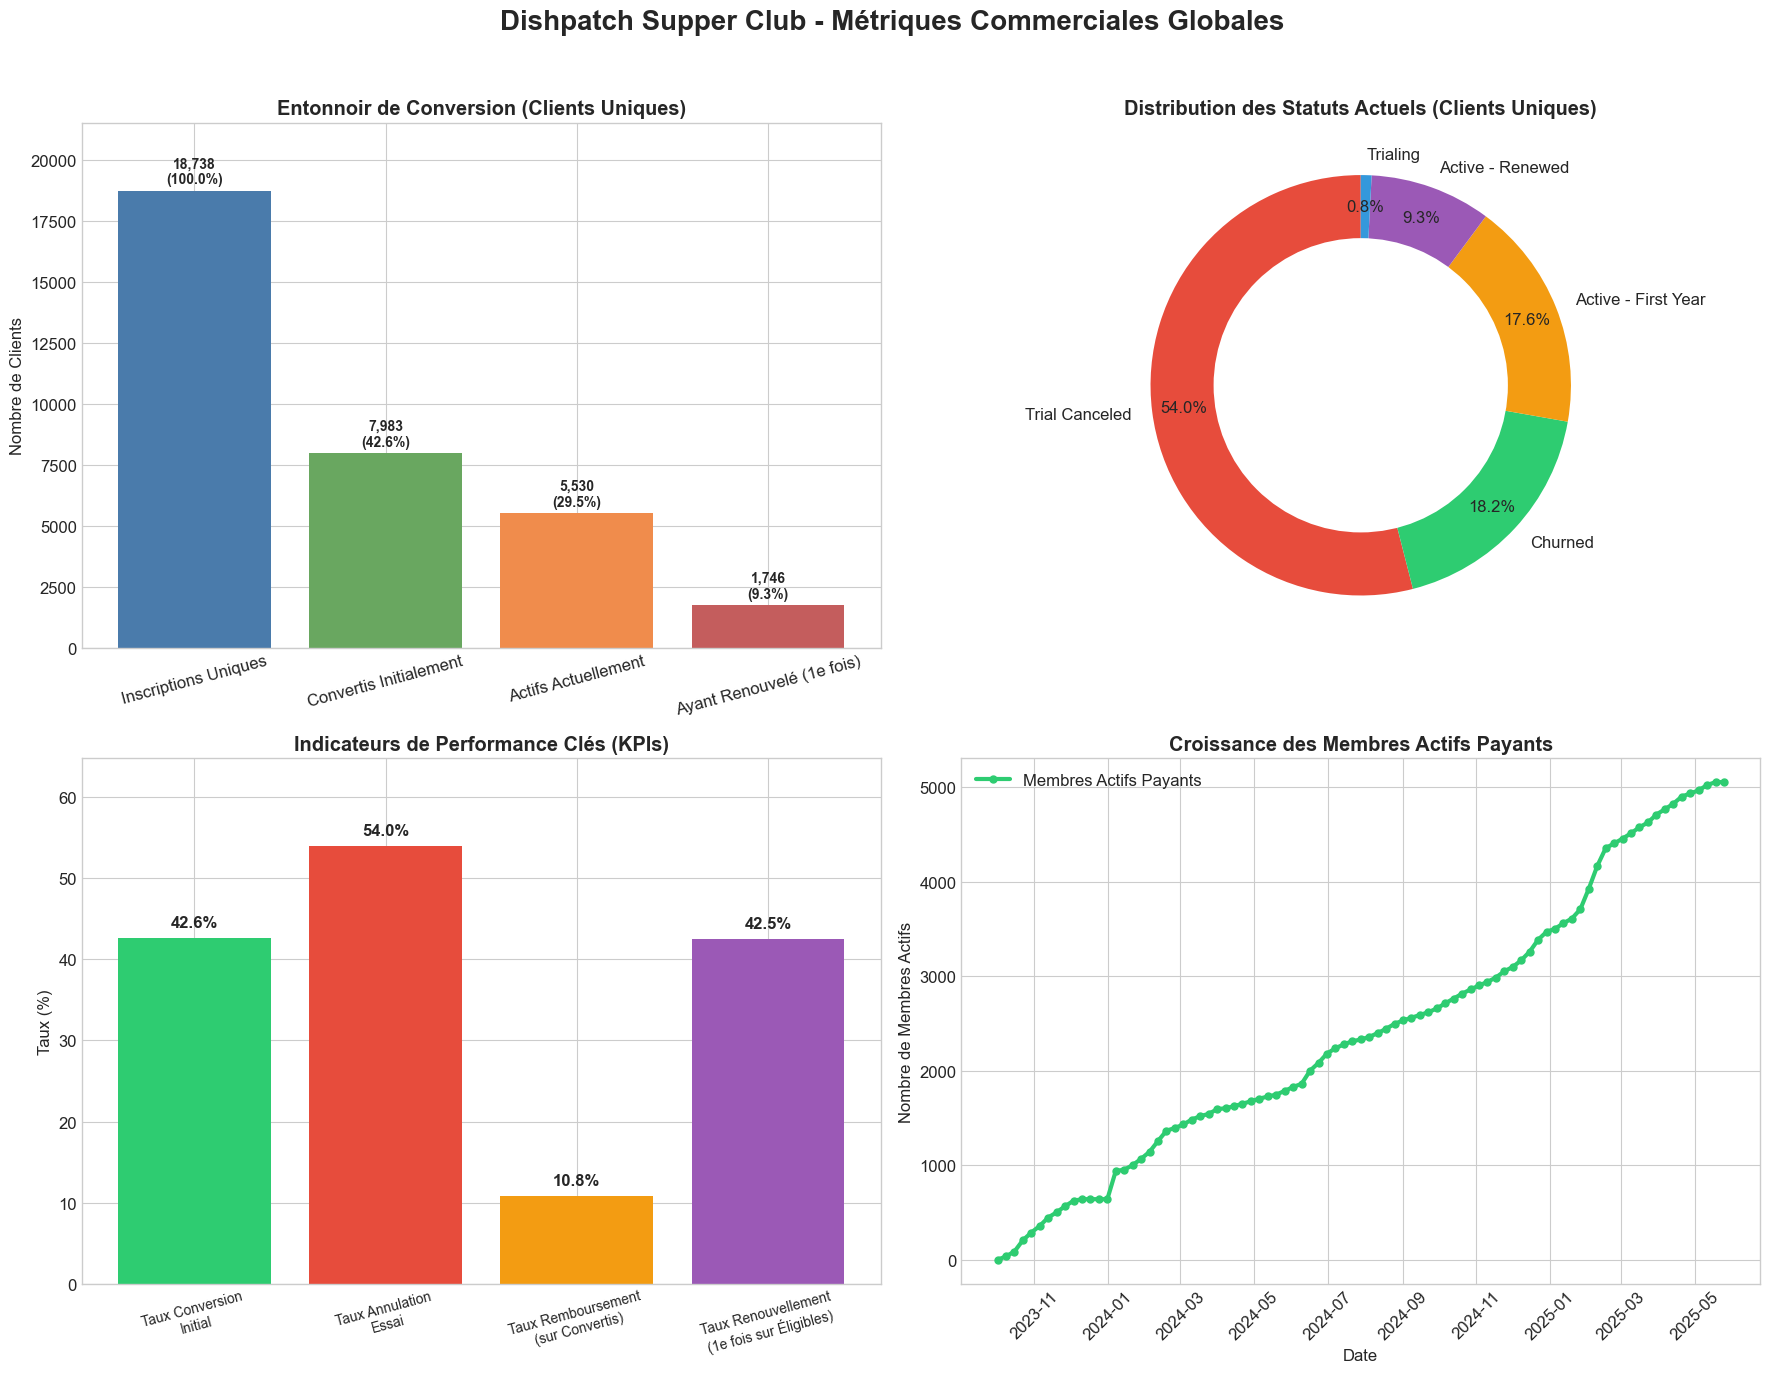


📊 Génération du tableau de bord des cohortes...


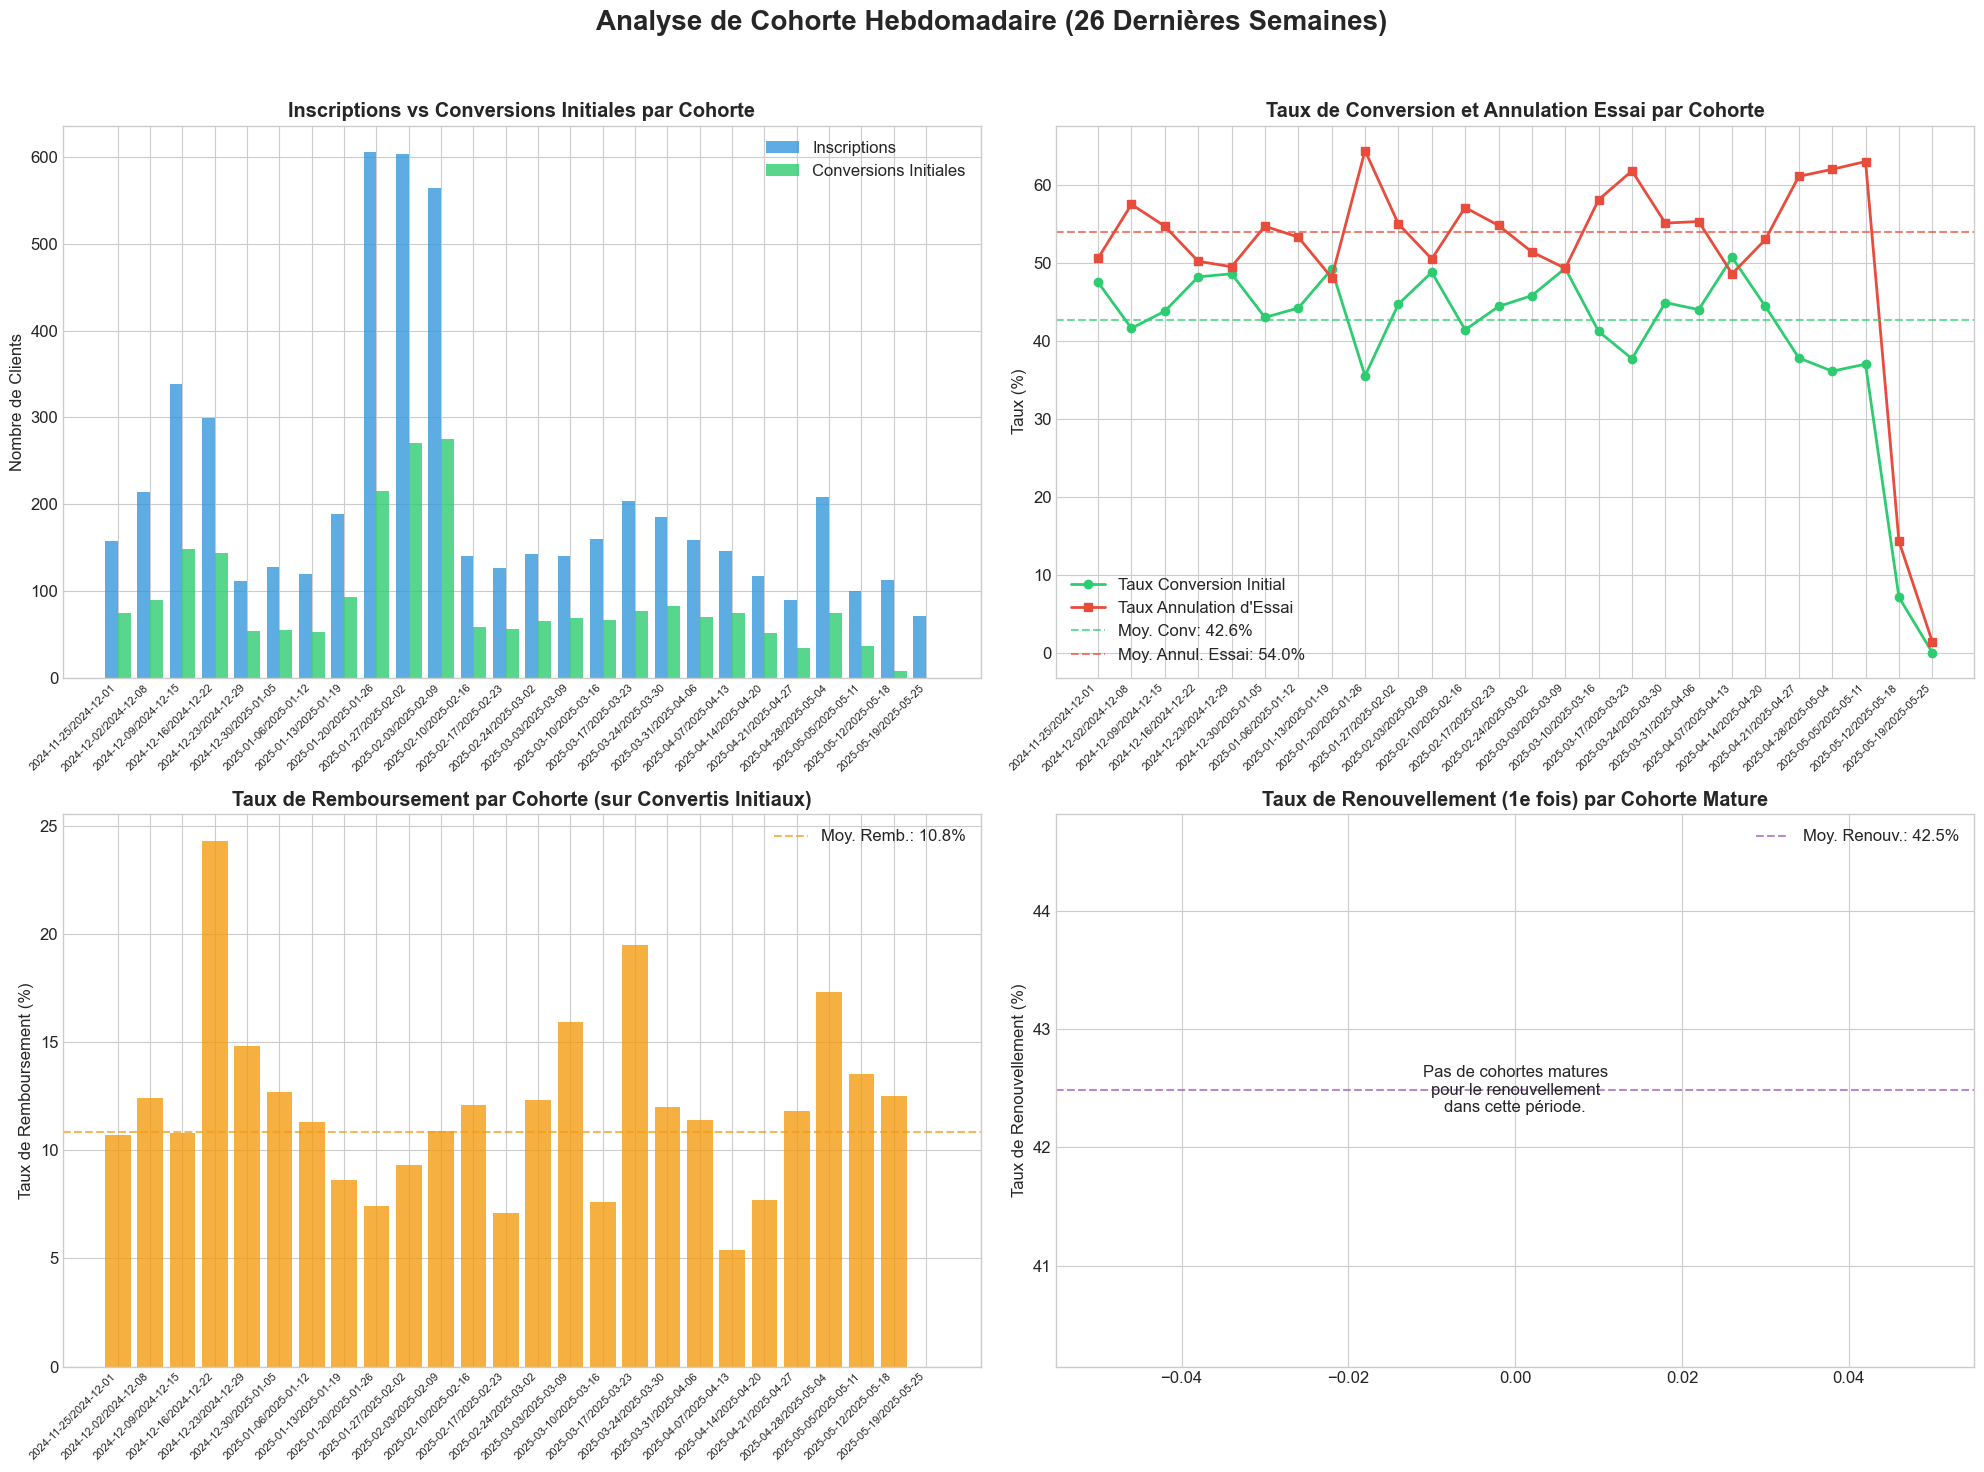


📊 Génération de l'analyse temporelle détaillée...


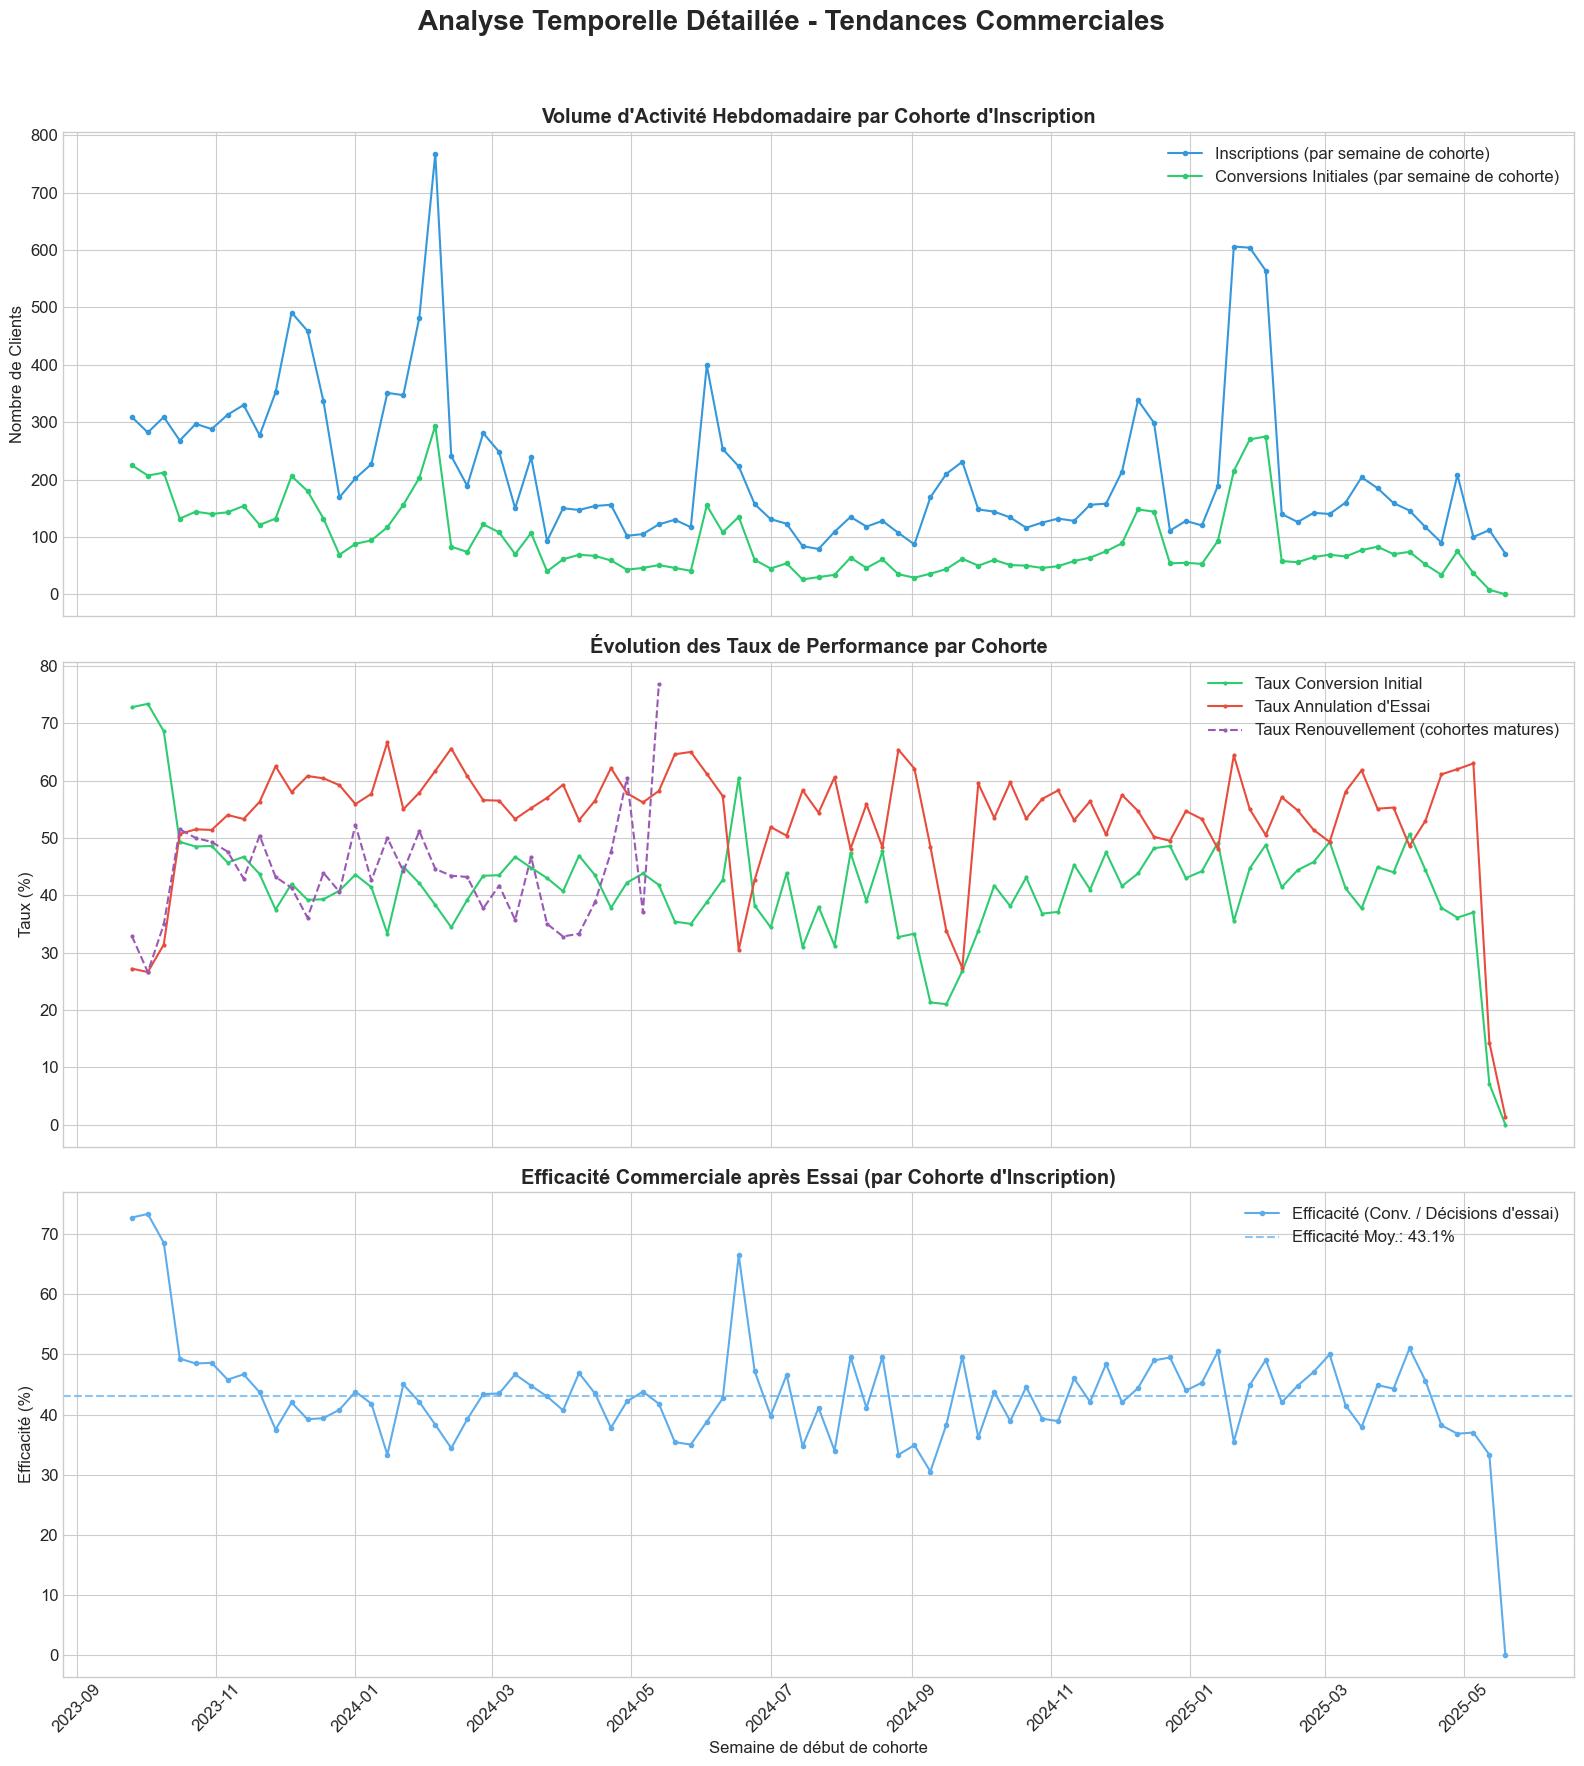


📊 Génération du tableau de bord exécutif...


/var/folders/2c/jlpbrr154jg9cfp1pzbh8x5h0000gn/T/ipykernel_81303/1726295911.py:459: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


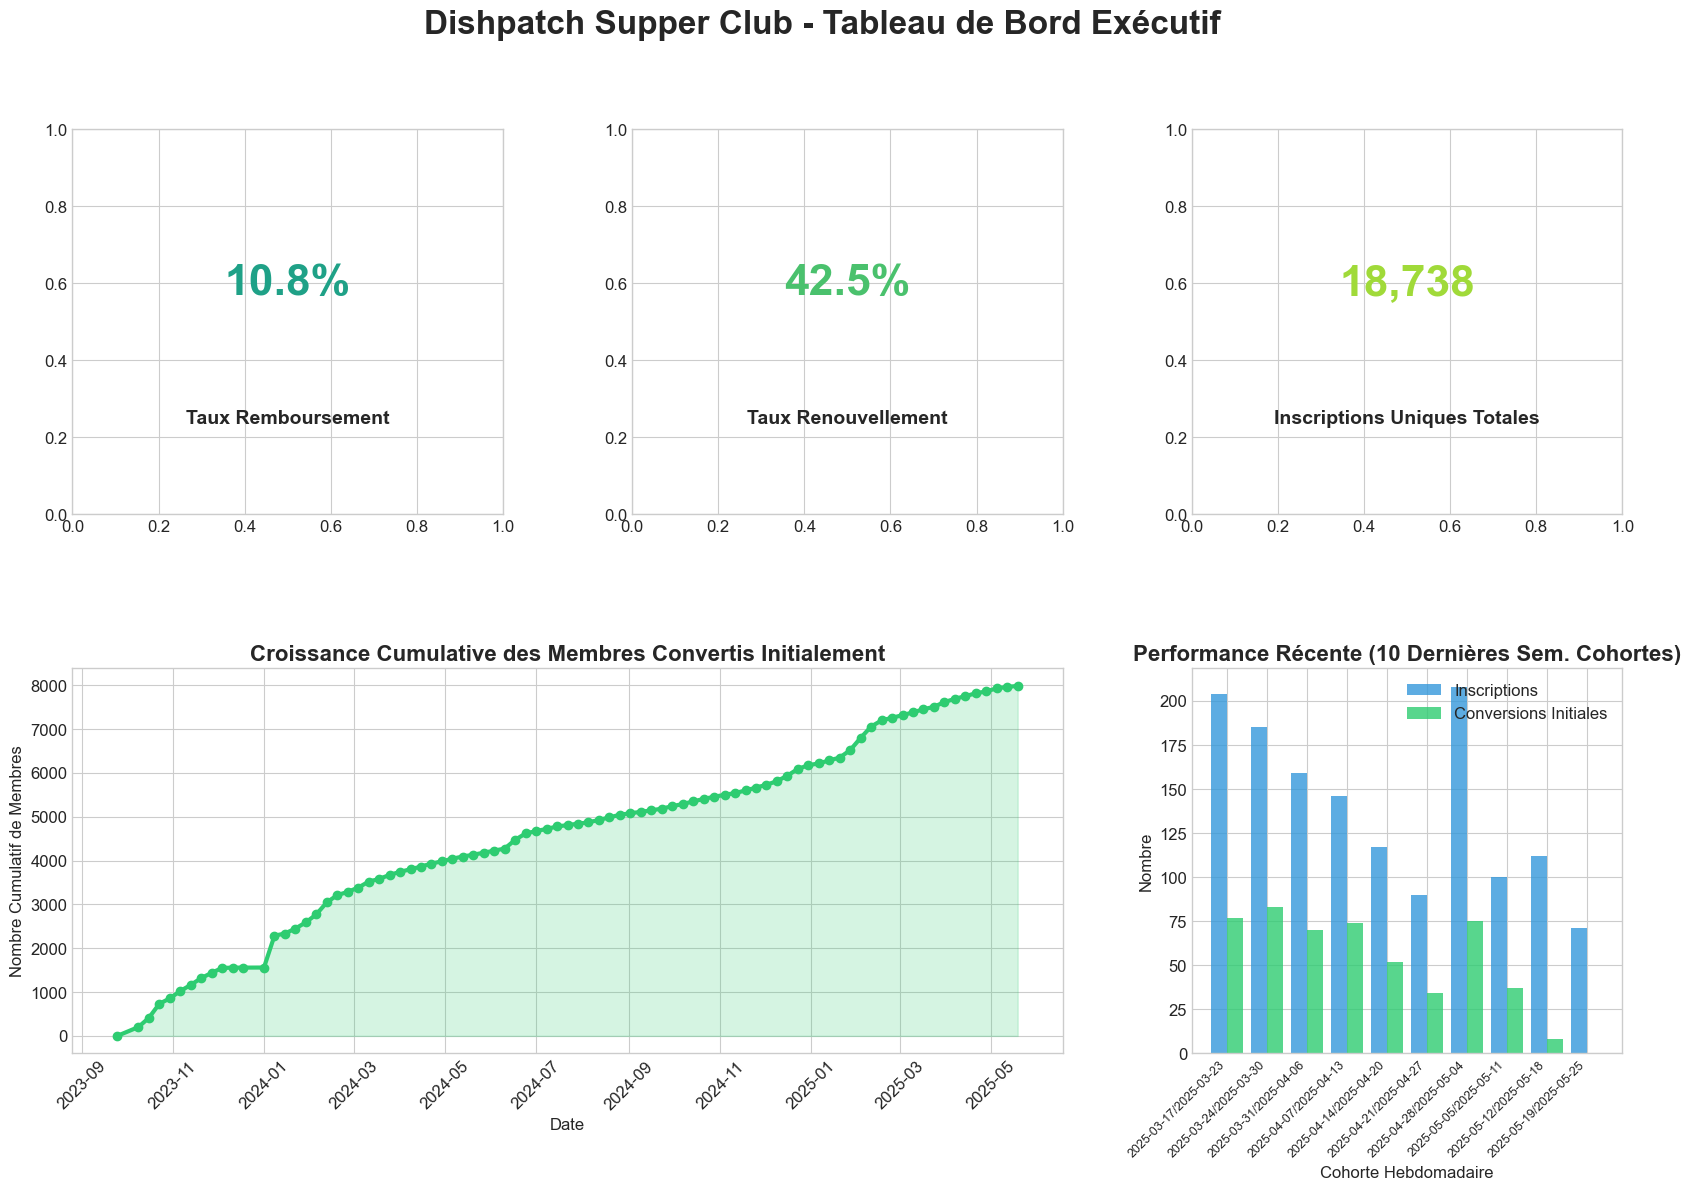


📊 Génération de l'analyse du cycle de vie des clients...


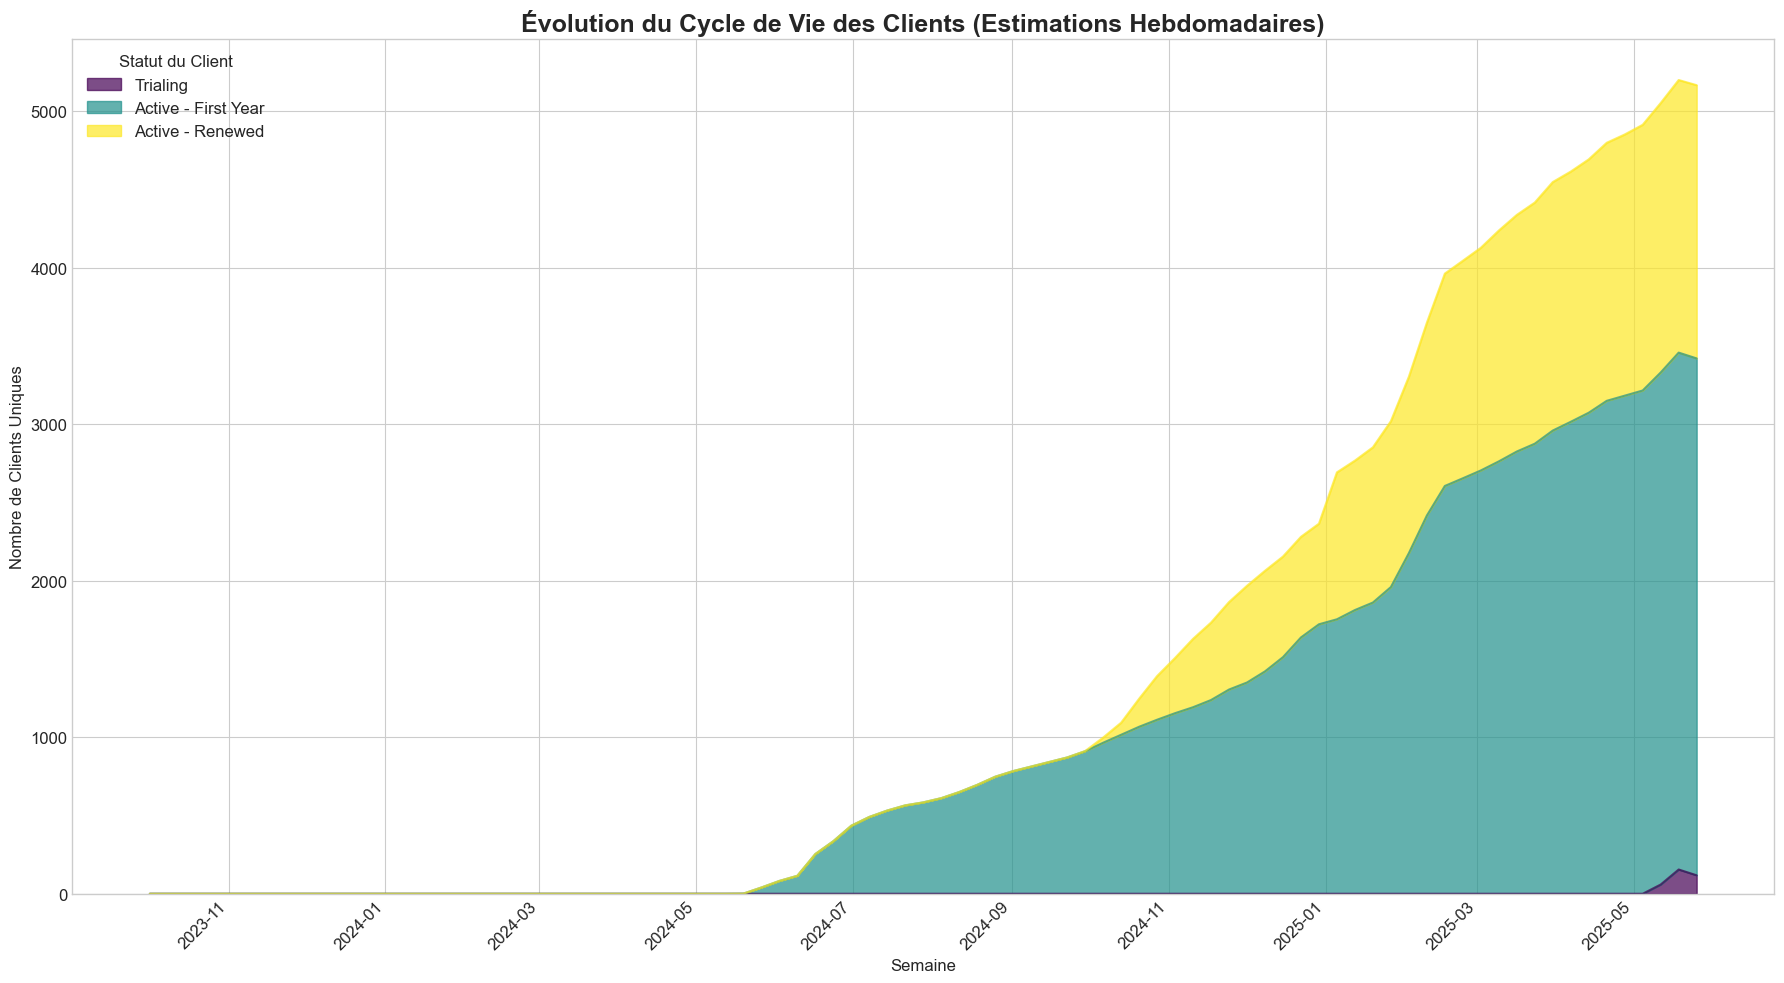


--- 7. RÉSUMÉ DES INDICATEURS CLÉS POUR PRÉSENTATION ---
                                             Indicateur  Valeur
              Inscriptions Uniques Totales (non-cadeau)  18,738
                            Membres Actifs Actuellement   5,530
                             Taux de Conversion Initial   42.6%
        Taux de Renouvellement (1e fois, sur éligibles)   42.5%
                              Taux d'Annulation d'Essai   54.0%
         Taux de Remboursement (sur convertis initiaux)   10.8%
                Revenu Mensuel Estimé (basé sur actifs) £31,798
 Moy. Inscriptions Uniques / Sem. (sur période cohorte)     215
Moy. Conversions Initiales / Sem. (sur période cohorte)      92

🎯 ANALYSE AMÉLIORÉE TERMINÉE !
📊 Plusieurs visualisations clés ont été générées et mises à jour.
💼 Prêt pour la présentation client !


In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tseries.offsets import Week
from datetime import datetime, timedelta

# Configuration générale
plt.style.use('seaborn-v0_8-whitegrid') # Utilisation d'un style seaborn moderne
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis") # Palette de couleurs

# --- CONFIGURATION ET CHARGEMENT DES DONNÉES ---
print("=== DISHPATCH SUPPER CLUB - ANALYSE COMMERCIALE COMPLÈTE (AMÉLIORÉE) ===")
data_dir = os.path.join('data')
file_path = os.path.abspath(os.path.join(data_dir, 'DishpatchSubscriptionData_NIklas_Sanitised - subscriptions (2).csv'))

# Spécifier les dtypes pour éviter les DtypeWarning et assurer la bonne lecture
# Adaptez les numéros de colonnes si la structure de votre CSV a changé.
# Col 2: 'Customer Name', Col 21: 'shipping_address_province (metadata)'
# Col 30: 'discount_code (metadata)', Col 33: 'referrer (metadata)'
# Il est préférable d'utiliser les noms de colonnes directement si possible.
# Pour l'instant, je vais supposer que ces colonnes peuvent être lues comme 'str'
dtype_spec = {
    'Customer Name': 'str',
    'shipping_address_province (metadata)': 'str',
    'discount_code (metadata)': 'str',
    'referrer (metadata)': 'str'
    # Ajoutez d'autres colonnes si nécessaire, ex: 'senderShopifyCustomerId (metadata)': 'str'
}
try:
    df_raw = pd.read_csv(file_path, dtype=dtype_spec)
except Exception as e:
    print(f"Erreur lors de la lecture du CSV : {e}")
    print("Veuillez vérifier le chemin du fichier et les spécifications dtype.")
    exit()

print(f"📊 Données brutes chargées : {len(df_raw):,} lignes, {len(df_raw.columns)} colonnes")

# --- PRÉTRAITEMENT DES DONNÉES ---
print("\n--- 1. PRÉTRAITEMENT DES DONNÉES ---")
df = df_raw.copy()

# Conversion des dates (celles qui existent et sont pertinentes)
date_cols = [col for col in df.columns if '(UTC)' in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Renommage et sélection
df = df.rename(columns={
    'senderShopifyCustomerId (metadata)': 'gift_sender_id',
    'id': 'subscription_id', # Plus explicite
    'Customer ID': 'customer_id',
    'Start Date (UTC)': 'signup_date_utc',
    'Trial End (UTC)': 'trial_end_date_utc',
    'Ended At (UTC)': 'ended_at_date_utc',
    'Canceled At (UTC)': 'canceled_at_date_utc',
    'Current Period End (UTC)': 'current_period_end_date_utc'
})

# Date de référence pour l'analyse (aujourd'hui)
reference_date = pd.to_datetime('2025-05-26')
print(f"📅 Date de référence pour l'analyse : {reference_date.strftime('%Y-%m-%d')}")

# Identification des membres cadeaux vs. inscriptions régulières
df['is_gift_member'] = df['gift_sender_id'].notna()
df['is_regular_signup'] = ~df['is_gift_member']

# Filtrer pour ne garder que les inscriptions régulières pour la plupart des analyses de KPI
analysis_df = df[df['is_regular_signup']].copy()
print(f"Nombre d'inscriptions régulières pour l'analyse : {len(analysis_df):,}")

# --- 2. DÉFINITION DES INDICATEURS CLÉS AU NIVEAU DE L'ABONNEMENT/CLIENT ---
print("\n--- 2. DÉFINITION DES INDICATEURS CLÉS (CLIENT UNIQUE) ---")

# A. Conversion initiale (a payé au moins une fois après l'essai)
# Un client est considéré comme ayant payé après l'essai si son essai s'est terminé
# ET (il est 'active'/'past_due' OU il a été 'canceled' APRÈS la fin de l'essai)
analysis_df['paid_after_trial'] = (
    analysis_df['trial_end_date_utc'].notna() &  # Condition 1: trial_end_date must exist
    (
        analysis_df['Status'].isin(['active', 'past_due']) |  # Condition 2a: Status is active or past_due
        (                                                   # OR Condition 2b: Status is canceled AFTER trial end
            (analysis_df['Status'] == 'canceled') &         #   Sub-condition 2b-i: Status is 'canceled'
            (analysis_df['canceled_at_date_utc'].notna()) & #   Sub-condition 2b-ii: canceled_at_date_utc exists
            (analysis_df['canceled_at_date_utc'] > analysis_df['trial_end_date_utc']) # Sub-condition 2b-iii: canceled after trial end
        )
    )
)

# B. Annulation pendant l'essai
analysis_df['is_trial_cancellation'] = (
    (   # Scenario 1: Canceled during a trial that had a defined trial_end_date
        (analysis_df['Status'] == 'canceled') &
        (analysis_df['trial_end_date_utc'].notna()) &
        (analysis_df['canceled_at_date_utc'].notna()) &
        (analysis_df['canceled_at_date_utc'] <= analysis_df['trial_end_date_utc'])
    ) |
    (   # Scenario 2: Canceled, and trial_end_date is NaN (implies canceled very early or before trial properly started)
        (analysis_df['Status'] == 'canceled') &
        (analysis_df['trial_end_date_utc'].isna()) & # trial_end_date is missing
        (analysis_df['canceled_at_date_utc'].notna()) # but there is a cancellation date
    )
)

# C. Churn post-paiement (événement de churn après une conversion initiale)
# Ceci est plus un "événement" de churn. Un client peut avoir plusieurs subscriptions.
# Pour simplifier, on considère le premier churn après la première conversion.
analysis_df['is_post_initial_payment_churn'] = analysis_df['paid_after_trial'] & \
                                             (analysis_df['Status'] == 'canceled') # Ou ended_at_date_utc is not null

# D. Remboursement (annulé dans les 14 jours APRÈS le paiement initial / fin de l'essai)
analysis_df['is_refund'] = analysis_df['paid_after_trial'] & \
                           (analysis_df['Status'] == 'canceled') & \
                           (analysis_df['canceled_at_date_utc'].notna() & analysis_df['trial_end_date_utc'].notna() & \
                            ((analysis_df['canceled_at_date_utc'] - analysis_df['trial_end_date_utc']).dt.days <= 14))

# E. Toujours en essai
analysis_df['is_currently_trialing'] = analysis_df['Status'] == 'trialing'

# F. Logique de Renouvellement (plus complexe, gérée au niveau client)
#   Date de début de l'abonnement payant = fin de l'essai
analysis_df['subscription_start_date'] = analysis_df['trial_end_date_utc']


# --- AGRÉGATION AU NIVEAU CLIENT UNIQUE ---
# Pour de nombreux KPIs, nous avons besoin d'une vue par client unique.
# On prend la première inscription pertinente pour chaque client.
# (Simplification: on pourrait avoir des logiques plus complexes pour clients avec multiples inscriptions/réactivations)
customer_df = analysis_df.sort_values(by=['customer_id', 'signup_date_utc']).drop_duplicates(subset=['customer_id'], keep='first').copy()

customer_df['paid_initial_subscription'] = customer_df['paid_after_trial'] # A payé la 1ere fois
customer_df['trial_canceled'] = customer_df['is_trial_cancellation']
customer_df['refunded_initial'] = customer_df['is_refund']
customer_df['currently_trialing'] = customer_df['is_currently_trialing']
customer_df['first_subscription_start_date'] = customer_df['subscription_start_date']

# Logique de renouvellement au niveau client
customer_df['eligible_for_1st_renewal'] = customer_df['paid_initial_subscription'] & \
                                       customer_df['first_subscription_start_date'].notna() & \
                                       ((reference_date - customer_df['first_subscription_start_date']).dt.days > 365)

customer_df['renewal_due_date_1st'] = customer_df['first_subscription_start_date'] + timedelta(days=365)

# Un client a effectivement renouvelé si:
# 1. Il était éligible au renouvellement.
# 2. Son abonnement n'a pas de date de fin OU sa date de fin est APRES la date de renouvellement prévue.
#    ET son statut est 'active' ou 'past_due' autour de cette période (approximation ici)
#    Pour une logique plus fine, il faudrait vérifier les cycles de facturation Stripe.
#    Ici, on se base sur le fait que s'ils sont éligibles et toujours actifs (ou leur ended_at est lointain), ils ont probablement renouvelé.
customer_df['actually_renewed_1st'] = customer_df['eligible_for_1st_renewal'] & \
    (customer_df['ended_at_date_utc'].isna() | (customer_df['ended_at_date_utc'] >= customer_df['renewal_due_date_1st'])) & \
    customer_df['Status'].isin(['active', 'past_due']) # Ajout pour s'assurer qu'ils sont actifs au moment du renouvellement

# Statut actuel du client (simplifié)
customer_df['current_status_agg'] = 'Churned' # Par défaut
customer_df.loc[customer_df['currently_trialing'], 'current_status_agg'] = 'Trialing'
customer_df.loc[customer_df['paid_initial_subscription'] & customer_df['Status'].isin(['active', 'past_due']) & ~customer_df['actually_renewed_1st'], 'current_status_agg'] = 'Active - First Year'
customer_df.loc[customer_df['actually_renewed_1st'] & customer_df['Status'].isin(['active', 'past_due']), 'current_status_agg'] = 'Active - Renewed'
customer_df.loc[customer_df['trial_canceled'], 'current_status_agg'] = 'Trial Canceled' # Peut écraser Churned si annulé pendant l'essai

# --- 3. CALCUL DES KPIS GLOBAUX (BASÉS SUR CLIENTS UNIQUES) ---
print("\n--- 3. CALCUL DES KPIS GLOBAUX (CLIENTS UNIQUES) ---")
total_unique_signups = customer_df['customer_id'].nunique()
total_initial_conversions = customer_df['paid_initial_subscription'].sum()
total_trial_cancellations = customer_df['trial_canceled'].sum()
total_refunded = customer_df['refunded_initial'].sum()
total_eligible_for_renewal = customer_df['eligible_for_1st_renewal'].sum()
total_actually_renewed = customer_df['actually_renewed_1st'].sum()
current_active_members = customer_df[customer_df['Status'].isin(['active', 'past_due'])]['customer_id'].nunique()

kpi_conversion_rate = (total_initial_conversions / total_unique_signups * 100) if total_unique_signups > 0 else 0
kpi_trial_cancel_rate = (total_trial_cancellations / total_unique_signups * 100) if total_unique_signups > 0 else 0
kpi_refund_rate = (total_refunded / total_initial_conversions * 100) if total_initial_conversions > 0 else 0
kpi_renewal_rate = (total_actually_renewed / total_eligible_for_renewal * 100) if total_eligible_for_renewal > 0 else 0

print(f"Nombre total d'inscrits uniques (non-cadeau) : {total_unique_signups:,}")
print(f"Nombre total de conversions initiales uniques : {total_initial_conversions:,}")
print(f"Membres actifs actuellement (payants) : {current_active_members:,}")
print(f"Taux de conversion initial : {kpi_conversion_rate:.1f}%")
print(f"Taux d'annulation d'essai : {kpi_trial_cancel_rate:.1f}%")
print(f"Taux de remboursement (sur convertis initiaux) : {kpi_refund_rate:.1f}%")
print(f"Clients éligibles au 1er renouvellement : {total_eligible_for_renewal:,}")
print(f"Clients ayant effectivement effectué le 1er renouvellement : {total_actually_renewed:,}")
print(f"Taux de renouvellement (sur éligibles) : {kpi_renewal_rate:.1f}%")

# --- 4. ANALYSE DE COHORTE TEMPORELLE ---
print("\n--- 4. ANALYSE DE COHORTE TEMPORELLE ---")
# Cohortes basées sur la semaine d'inscription du client unique
customer_df['signup_week'] = customer_df['signup_date_utc'].dt.to_period('W-SUN')

cohort_analysis_df = customer_df.groupby('signup_week').agg(
    total_signups_cohort = ('customer_id', 'nunique'),
    initial_conversions_cohort = ('paid_initial_subscription', 'sum'),
    trial_cancellations_cohort = ('trial_canceled', 'sum'),
    refunds_cohort = ('refunded_initial', 'sum'),
    # Pour le renouvellement, il faut que la cohorte soit mature
    eligible_for_renewal_cohort = ('eligible_for_1st_renewal', 'sum'),
    actually_renewed_cohort = ('actually_renewed_1st', 'sum')
).reset_index()

cohort_analysis_df['conversion_rate_cohort'] = (cohort_analysis_df['initial_conversions_cohort'] / cohort_analysis_df['total_signups_cohort'] * 100).round(1)
cohort_analysis_df['trial_cancel_rate_cohort'] = (cohort_analysis_df['trial_cancellations_cohort'] / cohort_analysis_df['total_signups_cohort'] * 100).round(1)
cohort_analysis_df['refund_rate_cohort'] = (cohort_analysis_df['refunds_cohort'] / cohort_analysis_df['initial_conversions_cohort'] * 100).round(1)
cohort_analysis_df['renewal_rate_cohort'] = (cohort_analysis_df['actually_renewed_cohort'] / cohort_analysis_df['eligible_for_renewal_cohort'] * 100).round(1)

# Remplacer NaN par 0 pour les taux où le dénominateur pourrait être 0 (ex: cohortes récentes pour renouvellement)
cohort_analysis_df = cohort_analysis_df.fillna(0)

print(f"Cohortes analysées : {len(cohort_analysis_df)}")
print(cohort_analysis_df.tail())


# --- 5. PRÉPARATION DES DONNÉES POUR VISUALISATIONS TEMPORELLES ---
# Croissance des membres actifs
active_timeline = []
date_range_for_plots = pd.date_range(analysis_df['signup_date_utc'].min(), reference_date, freq='W-SUN')

for week_start_date in date_range_for_plots:
    week_end_date = week_start_date + timedelta(days=6)
    active_count = analysis_df[
        analysis_df['paid_after_trial'] & # Doit avoir payé une fois
        (analysis_df['subscription_start_date'] <= week_end_date) & # Abonnement commencé
        (analysis_df['ended_at_date_utc'].isna() | (analysis_df['ended_at_date_utc'] > week_start_date)) & # Pas terminé avant début semaine
        (analysis_df['Status'].isin(['active', 'past_due'])) # Statut actuel actif
    ]['customer_id'].nunique() # Clients uniques
    active_timeline.append({'week_start': week_start_date, 'active_members': active_count})
active_members_df = pd.DataFrame(active_timeline)

# Croissance cumulative des conversions initiales
cumulative_conversions_df = customer_df[customer_df['paid_initial_subscription']].groupby(customer_df['first_subscription_start_date'].dt.to_period('W-SUN'))['customer_id'].nunique().cumsum().reset_index()
cumulative_conversions_df.columns = ['week', 'cumulative_initial_conversions']
cumulative_conversions_df['week_start'] = cumulative_conversions_df['week'].dt.start_time


# --- 6. VISUALISATIONS AMÉLIORÉES ET NOUVELLES ---
print("\n--- 6. GÉNÉRATION DES VISUALISATIONS ---")

# VISUALISATION 1: TABLEAU DE BORD GLOBAL (KPIs et Entonnoir)
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
fig1.suptitle('Dishpatch Supper Club - Métriques Commerciales Globales', fontsize=20, fontweight='bold')

# 1.1 Entonnoir de Conversion Corrigé
funnel_stages = ['Inscriptions Uniques', 'Convertis Initialement', 'Actifs Actuellement', 'Ayant Renouvelé (1e fois)']
funnel_counts = [
    total_unique_signups,
    total_initial_conversions,
    current_active_members, # Ceux actifs maintenant (peuvent être en Y1 ou Y2+)
    total_actually_renewed # Ceux qui ont spécifiquement passé le cap du 1er renouvellement
]
funnel_colors = ['#4a7bab', '#69a760', '#f08c4c', '#c45d5d']

bars = ax1.bar(funnel_stages, funnel_counts, color=funnel_colors)
ax1.set_title('Entonnoir de Conversion (Clients Uniques)', fontweight='bold')
ax1.set_ylabel('Nombre de Clients')
ax1.tick_params(axis='x', rotation=15)
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / funnel_counts[0] * 100) if funnel_counts[0] > 0 else 0
    ax1.text(bar.get_x() + bar.get_width()/2., height + (0.01 * funnel_counts[0]), f'{height:,}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=10)
ax1.set_ylim(0, funnel_counts[0] * 1.15)


# 1.2 Distribution des Statuts Actuels des Clients Uniques
status_counts_agg = customer_df['current_status_agg'].value_counts()
status_colors = ['#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#3498db', '#1abc9c']
wedges, texts, autotexts = ax2.pie(status_counts_agg.values, labels=status_counts_agg.index, autopct='%1.1f%%',
                                   colors=status_colors[:len(status_counts_agg)], startangle=90, pctdistance=0.85)
ax2.set_title('Distribution des Statuts Actuels (Clients Uniques)', fontweight='bold')
ax2.add_artist(plt.Circle((0,0),0.70,fc='white')) # Donut chart

# 1.3 KPIs Commerciaux Clés
kpi_names = ['Taux Conversion\nInitial', 'Taux Annulation\nEssai', 'Taux Remboursement\n(sur Convertis)', 'Taux Renouvellement\n(1e fois sur Éligibles)']
kpi_values = [kpi_conversion_rate, kpi_trial_cancel_rate, kpi_refund_rate, kpi_renewal_rate]
kpi_bars = ax3.bar(kpi_names, kpi_values, color=['#2ecc71', '#e74c3c', '#f39c12', '#9b59b6'])
ax3.set_title('Indicateurs de Performance Clés (KPIs)', fontweight='bold')
ax3.set_ylabel('Taux (%)')
ax3.tick_params(axis='x', rotation=15, labelsize=10)
for bar in kpi_bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
ax3.set_ylim(0, max(kpi_values) * 1.2 if kpi_values else 10)


# 1.4 Croissance des Membres Actifs
ax4.plot(active_members_df['week_start'], active_members_df['active_members'],
         linewidth=3, color='#2ecc71', marker='o', markersize=5, label="Membres Actifs Payants")
ax4.set_title('Croissance des Membres Actifs Payants', fontweight='bold')
ax4.set_ylabel('Nombre de Membres Actifs')
ax4.set_xlabel('Date')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax4.tick_params(axis='x', rotation=45)
ax4.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# VISUALISATION 2: ANALYSE DE COHORTE HEBDOMADAIRE (DERNIÈRES 26 SEMAINES)
print("\n📊 Génération du tableau de bord des cohortes...")
recent_cohorts = cohort_analysis_df.tail(26).copy() # Dernier semestre
recent_cohorts['cohort_week_str'] = recent_cohorts['signup_week'].astype(str) # Pour l'affichage

fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
fig2.suptitle('Analyse de Cohorte Hebdomadaire (26 Dernières Semaines)', fontsize=20, fontweight='bold')
x_pos_cohort = np.arange(len(recent_cohorts))

# 2.1 Inscriptions vs Conversions Initiales par Semaine
ax1.bar(x_pos_cohort - 0.2, recent_cohorts['total_signups_cohort'], width=0.4, label='Inscriptions', color='#3498db', alpha=0.8)
ax1.bar(x_pos_cohort + 0.2, recent_cohorts['initial_conversions_cohort'], width=0.4, label='Conversions Initiales', color='#2ecc71', alpha=0.8)
ax1.set_title('Inscriptions vs Conversions Initiales par Cohorte', fontweight='bold')
ax1.set_ylabel('Nombre de Clients')
ax1.set_xticks(x_pos_cohort)
ax1.set_xticklabels(recent_cohorts['cohort_week_str'], rotation=45, ha="right", fontsize=8)
ax1.legend()

# 2.2 Taux de Conversion et d'Annulation d'Essai par Cohorte
ax2.plot(x_pos_cohort, recent_cohorts['conversion_rate_cohort'], linewidth=2, color='#2ecc71', marker='o', label='Taux Conversion Initial')
ax2.plot(x_pos_cohort, recent_cohorts['trial_cancel_rate_cohort'], linewidth=2, color='#e74c3c', marker='s', label="Taux Annulation d'Essai")
ax2.set_title('Taux de Conversion et Annulation Essai par Cohorte', fontweight='bold')
ax2.set_ylabel('Taux (%)')
ax2.set_xticks(x_pos_cohort)
ax2.set_xticklabels(recent_cohorts['cohort_week_str'], rotation=45, ha="right", fontsize=8)
ax2.axhline(y=kpi_conversion_rate, color='#2ecc71', linestyle='--', alpha=0.7, label=f'Moy. Conv: {kpi_conversion_rate:.1f}%')
ax2.axhline(y=kpi_trial_cancel_rate, color='#e74c3c', linestyle='--', alpha=0.7, label=f'Moy. Annul. Essai: {kpi_trial_cancel_rate:.1f}%')
ax2.legend()

# 2.3 Taux de Remboursement par Cohorte
ax3.bar(x_pos_cohort, recent_cohorts['refund_rate_cohort'], color='#f39c12', alpha=0.8)
ax3.set_title('Taux de Remboursement par Cohorte (sur Convertis Initiaux)', fontweight='bold')
ax3.set_ylabel('Taux de Remboursement (%)')
ax3.set_xticks(x_pos_cohort)
ax3.set_xticklabels(recent_cohorts['cohort_week_str'], rotation=45, ha="right", fontsize=8)
ax3.axhline(y=kpi_refund_rate, color='#f39c12', linestyle='--', alpha=0.7, label=f'Moy. Remb.: {kpi_refund_rate:.1f}%')
ax3.legend()


# 2.4 Taux de Renouvellement par Cohorte (pour les cohortes matures)
mature_cohorts_for_renewal = recent_cohorts[recent_cohorts['eligible_for_renewal_cohort'] > 0]
x_pos_renewal_cohort = np.arange(len(mature_cohorts_for_renewal)) # Nouvel axe X pour cohortes matures

ax4.bar(x_pos_renewal_cohort, mature_cohorts_for_renewal['renewal_rate_cohort'], color='#9b59b6', alpha=0.8)
ax4.set_title('Taux de Renouvellement (1e fois) par Cohorte Mature', fontweight='bold')
ax4.set_ylabel('Taux de Renouvellement (%)')
if not mature_cohorts_for_renewal.empty:
    ax4.set_xticks(x_pos_renewal_cohort)
    ax4.set_xticklabels(mature_cohorts_for_renewal['cohort_week_str'], rotation=45, ha="right", fontsize=8)
ax4.axhline(y=kpi_renewal_rate, color='#9b59b6', linestyle='--', alpha=0.7, label=f'Moy. Renouv.: {kpi_renewal_rate:.1f}%')
ax4.legend()
if mature_cohorts_for_renewal.empty:
    ax4.text(0.5, 0.5, "Pas de cohortes matures\npour le renouvellement\ndans cette période.", ha='center', va='center', transform=ax4.transAxes)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# VISUALISATION 3: ANALYSE TEMPORELLE DÉTAILLÉE
print("\n📊 Génération de l'analyse temporelle détaillée...")
# Utiliser cohort_analysis_df complet pour les tendances longues
all_cohorts_df = cohort_analysis_df.copy()
all_cohorts_df['cohort_week_dt'] = all_cohorts_df['signup_week'].dt.start_time # Convertir en datetime pour l'axe

fig3, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 18), sharex=True)
fig3.suptitle('Analyse Temporelle Détaillée - Tendances Commerciales', fontsize=20, fontweight='bold')

# 3.1 Volume d'Activité Hebdomadaire (Inscriptions et Conversions Initiales)
ax1.plot(all_cohorts_df['cohort_week_dt'], all_cohorts_df['total_signups_cohort'], label='Inscriptions (par semaine de cohorte)', color='#3498db', marker='.', linestyle='-')
ax1.plot(all_cohorts_df['cohort_week_dt'], all_cohorts_df['initial_conversions_cohort'], label='Conversions Initiales (par semaine de cohorte)', color='#2ecc71', marker='.', linestyle='-')
ax1.set_title("Volume d'Activité Hebdomadaire par Cohorte d'Inscription", fontweight='bold')
ax1.set_ylabel('Nombre de Clients')
ax1.legend()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# 3.2 Évolution des Taux de Performance
ax2.plot(all_cohorts_df['cohort_week_dt'], all_cohorts_df['conversion_rate_cohort'], label='Taux Conversion Initial', color='#2ecc71', marker='.', markersize=4)
ax2.plot(all_cohorts_df['cohort_week_dt'], all_cohorts_df['trial_cancel_rate_cohort'], label="Taux Annulation d'Essai", color='#e74c3c', marker='.', markersize=4)
# Tracer le taux de renouvellement seulement pour les cohortes où il est significatif
mature_renewal_trend = all_cohorts_df[all_cohorts_df['eligible_for_renewal_cohort'] > 5] # Ex: au moins 5 éligibles
ax2.plot(mature_renewal_trend['cohort_week_dt'], mature_renewal_trend['renewal_rate_cohort'], label='Taux Renouvellement (cohortes matures)', color='#9b59b6', marker='.', markersize=4, linestyle='--')
ax2.set_title('Évolution des Taux de Performance par Cohorte', fontweight='bold')
ax2.set_ylabel('Taux (%)')
ax2.legend()

# 3.3 Efficacité Commerciale (Convertis / (Convertis + Annulations Essai))
all_cohorts_df['total_decisions_cohort'] = all_cohorts_df['initial_conversions_cohort'] + all_cohorts_df['trial_cancellations_cohort']
all_cohorts_df['efficiency_rate_cohort'] = np.where(
    all_cohorts_df['total_decisions_cohort'] > 0,
    (all_cohorts_df['initial_conversions_cohort'] / all_cohorts_df['total_decisions_cohort'] * 100),
    0
).round(1)
avg_efficiency = all_cohorts_df['efficiency_rate_cohort'][all_cohorts_df['total_decisions_cohort'] > 0].mean()

ax3.plot(all_cohorts_df['cohort_week_dt'], all_cohorts_df['efficiency_rate_cohort'], label="Efficacité (Conv. / Décisions d'essai)", color='#5dadec', marker='.', linestyle='-')
ax3.axhline(y=avg_efficiency, color='#5dadec', linestyle='--', alpha=0.7, label=f'Efficacité Moy.: {avg_efficiency:.1f}%')
ax3.set_title("Efficacité Commerciale après Essai (par Cohorte d'Inscription)", fontweight='bold')
ax3.set_ylabel('Efficacité (%)')
ax3.set_xlabel('Semaine de début de cohorte')
ax3.legend()
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# VISUALISATION 4: TABLEAU DE BORD EXÉCUTIF (RÉSUMÉ)
print("\n📊 Génération du tableau de bord exécutif...")
fig4 = plt.figure(figsize=(20, 12)) # Ajustement de la taille
gs = fig4.add_gridspec(2, 3, hspace=0.4, wspace=0.3) # Grid spec pour KPIs en haut, graphiques en bas
fig4.suptitle('Dishpatch Supper Club - Tableau de Bord Exécutif', fontsize=24, fontweight='bold', y=0.98)

# KPIs Textuels
kpi_data_exec = {
    "Taux Conversion Initial": f"{kpi_conversion_rate:.1f}%",
    "Membres Actifs": f"{current_active_members:,}",
    "Revenu Mensuel Est.": f"£{current_active_members * 69 / 12:,.0f}", # Supposant £69/an
    "Taux Remboursement": f"{kpi_refund_rate:.1f}%",
    "Taux Renouvellement": f"{kpi_renewal_rate:.1f}%",
    "Inscriptions Uniques Totales": f"{total_unique_signups:,}"
}

for i, (title, value) in enumerate(kpi_data_exec.items()):
    ax_kpi = fig4.add_subplot(gs[0, i % 3]) # Positionner les KPIs sur la première ligne
    if i >= 3: # Pour la deuxième rangée de KPIs si plus de 3
        ax_kpi = fig4.add_subplot(gs[0, i % 3]) # Simple exemple, à ajuster si plus de KPIs
        
    ax_kpi.text(0.5, 0.6, value, ha='center', va='center', fontsize=32, fontweight='bold', color=sns.color_palette("viridis", len(kpi_data_exec))[i])
    ax_kpi.text(0.5, 0.25, title, ha='center', va='center', fontsize=14, fontweight='bold')
    ax_kpi.axis('off')

# Graphique Principal: Croissance Cumulative des Conversions Initiales
ax_main = fig4.add_subplot(gs[1, :2]) # Prend 2 colonnes sur la deuxième ligne
ax_main.plot(cumulative_conversions_df['week_start'], cumulative_conversions_df['cumulative_initial_conversions'], linewidth=3, color='#2ecc71', marker='o', markersize=6)
ax_main.fill_between(cumulative_conversions_df['week_start'], cumulative_conversions_df['cumulative_initial_conversions'], alpha=0.2, color='#2ecc71')
ax_main.set_title('Croissance Cumulative des Membres Convertis Initialement', fontsize=16, fontweight='bold')
ax_main.set_ylabel('Nombre Cumulatif de Membres')
ax_main.set_xlabel('Date')
ax_main.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_main.tick_params(axis='x', rotation=45)

# Graphique Secondaire: Performance Récente (Inscriptions vs Conv. dernières 10 semaines de cohortes)
ax_perf = fig4.add_subplot(gs[1, 2]) # Prend 1 colonne sur la deuxième ligne
recent_10_cohorts = cohort_analysis_df.tail(10).copy()
x_pos_recent = np.arange(len(recent_10_cohorts))
ax_perf.bar(x_pos_recent - 0.2, recent_10_cohorts['total_signups_cohort'], width=0.4, label='Inscriptions', color='#3498db', alpha=0.8)
ax_perf.bar(x_pos_recent + 0.2, recent_10_cohorts['initial_conversions_cohort'], width=0.4, label='Conversions Initiales', color='#2ecc71', alpha=0.8)
ax_perf.set_title('Performance Récente (10 Dernières Sem. Cohortes)', fontsize=16, fontweight='bold')
ax_perf.set_ylabel('Nombre')
ax_perf.set_xlabel('Cohorte Hebdomadaire')
ax_perf.set_xticks(x_pos_recent)
ax_perf.set_xticklabels(recent_10_cohorts['signup_week'].astype(str), rotation=45, ha="right", fontsize=9)
ax_perf.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# VISUALISATION 5: CYCLE DE VIE DES CLIENTS AU FIL DU TEMPS (NOUVEAU)
print("\n📊 Génération de l'analyse du cycle de vie des clients...")
# Préparer les données: pour chaque semaine, compter les clients dans chaque statut agrégé
lifecycle_data = []
customer_df_lc = customer_df.copy() # Copie pour cette analyse

for week_start_date_lc in date_range_for_plots: # Utilise le même range que active_members
    week_end_date_lc = week_start_date_lc + timedelta(days=6)
    
    # Déterminer le statut de chaque client À CETTE SEMAINE PRÉCISE
    trialing_this_week = customer_df_lc[
        (customer_df_lc['signup_date_utc'] <= week_end_date_lc) &
        (customer_df_lc['Status'] == 'trialing') & # Encore en essai actif
        (customer_df_lc['trial_end_date_utc'].notna() & (customer_df_lc['trial_end_date_utc'] > week_start_date_lc)) # L'essai n'est pas encore terminé
    ]['customer_id'].nunique()

    active_y1_this_week = customer_df_lc[
        customer_df_lc['paid_initial_subscription'] &
        (customer_df_lc['first_subscription_start_date'] <= week_end_date_lc) &
        (customer_df_lc['Status'].isin(['active', 'past_due'])) &
        ~customer_df_lc['actually_renewed_1st'] & # Pas encore renouvelé (ou pas éligible/pas réussi)
        (customer_df_lc['ended_at_date_utc'].isna() | (customer_df_lc['ended_at_date_utc'] > week_start_date_lc))
    ]['customer_id'].nunique()
    
    active_renewed_this_week = customer_df_lc[
        customer_df_lc['actually_renewed_1st'] &
        (customer_df_lc['renewal_due_date_1st'] <= week_end_date_lc) & # Le renouvellement a eu lieu
        (customer_df_lc['Status'].isin(['active', 'past_due'])) &
        (customer_df_lc['ended_at_date_utc'].isna() | (customer_df_lc['ended_at_date_utc'] > week_start_date_lc))
    ]['customer_id'].nunique()

    # Churned: Ceux qui se sont inscrits, ne sont plus en essai, ni actifs Y1, ni actifs renouvelés
    # C'est une approximation. Un churned est quelqu'un qui a eu un statut actif puis ne l'est plus.
    # Pour simplifier, on prend ceux qui ont une date de fin avant la semaine en cours.
    churned_this_week = customer_df_lc[
        (customer_df_lc['signup_date_utc'] <= week_end_date_lc) & # Doit s'être inscrit
        (customer_df_lc['ended_at_date_utc'].notna() & (customer_df_lc['ended_at_date_utc'] <= week_start_date_lc)) & # Date de fin passée
        (customer_df_lc['Status'] == 'canceled') # Statut final cancel
    ]['customer_id'].nunique()


    lifecycle_data.append({
        'week_start': week_start_date_lc,
        'Trialing': trialing_this_week,
        'Active - First Year': active_y1_this_week,
        'Active - Renewed': active_renewed_this_week,
        'Churned (Approximation)': churned_this_week # Note: le churn est complexe à capturer ainsi
    })

lifecycle_df = pd.DataFrame(lifecycle_data)
lifecycle_df = lifecycle_df.set_index('week_start')

fig5, ax_lc = plt.subplots(figsize=(18, 10))
lifecycle_df[['Trialing', 'Active - First Year', 'Active - Renewed']].plot(kind='area', stacked=True, ax=ax_lc, alpha=0.7,
                                                               cmap="viridis") # Utilise la palette viridis
ax_lc.set_title('Évolution du Cycle de Vie des Clients (Estimations Hebdomadaires)', fontsize=18, fontweight='bold')
ax_lc.set_ylabel('Nombre de Clients Uniques')
ax_lc.set_xlabel('Semaine')
ax_lc.legend(title='Statut du Client')
ax_lc.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- 7. RÉSUMÉ DES INDICATEURS CLÉS POUR PRÉSENTATION ---
print("\n--- 7. RÉSUMÉ DES INDICATEURS CLÉS POUR PRÉSENTATION ---")
metrics_summary = {
    'Indicateur': [
        'Inscriptions Uniques Totales (non-cadeau)',
        'Membres Actifs Actuellement',
        'Taux de Conversion Initial',
        'Taux de Renouvellement (1e fois, sur éligibles)',
        "Taux d'Annulation d'Essai",
        'Taux de Remboursement (sur convertis initiaux)',
        'Revenu Mensuel Estimé (basé sur actifs)',
        'Moy. Inscriptions Uniques / Sem. (sur période cohorte)',
        'Moy. Conversions Initiales / Sem. (sur période cohorte)'
    ],
    'Valeur': [
        f"{total_unique_signups:,}",
        f"{current_active_members:,}",
        f"{kpi_conversion_rate:.1f}%",
        f"{kpi_renewal_rate:.1f}%",
        f"{kpi_trial_cancel_rate:.1f}%",
        f"{kpi_refund_rate:.1f}%",
        f"£{current_active_members * 69 / 12:,.0f}", # £69/an
        f"{cohort_analysis_df['total_signups_cohort'].mean():.0f}" if not cohort_analysis_df.empty else "N/A",
        f"{cohort_analysis_df['initial_conversions_cohort'].mean():.0f}" if not cohort_analysis_df.empty else "N/A"
    ]
}
summary_df = pd.DataFrame(metrics_summary)
print(summary_df.to_string(index=False))

print(f"\n🎯 ANALYSE AMÉLIORÉE TERMINÉE !")
print(f"📊 Plusieurs visualisations clés ont été générées et mises à jour.")
print(f"💼 Prêt pour la présentation client !")